In [79]:
from tensorflow import keras
from keras.datasets import mnist

In [80]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [81]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [82]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

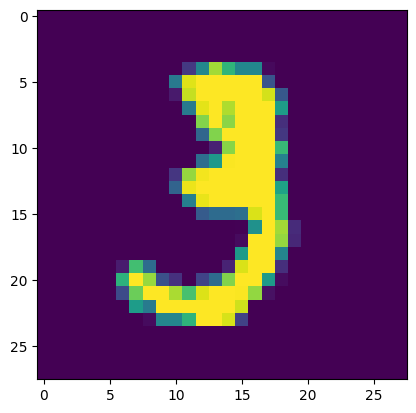

In [83]:
import matplotlib.pyplot as plt

plt.imshow(x_train[10])

# Preprocessing

In [84]:
x_train = x_train.reshape((-1,28,28,1)).astype('float32') / 255
x_test = x_test.reshape((-1,28,28,1)).astype('float32') / 255

In [85]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [86]:
x_train.shape , x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [87]:
model = keras.Sequential()
# Conv2D+BN+Activation+Maxpool
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), input_shape=(28, 28, 1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
# ----------------------------------------------------
# repeat
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3)))  
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
# --------------------------------------------------
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=128, activation="relu"))
model.add(keras.layers.Dense(units=10, activation="softmax"))


In [88]:
import tensorflow as tf
model.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.sparse_categorical_crossentropy,metrics=['accuracy'])

In [89]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_24 (Activation)      │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 11, 11, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 11, 11, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_25 (Activation)      │ (None, 11, 11, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,306 (481.66 KB)

 Trainable params: 123,114 (480.91 KB)

 Non-trainable params: 192 (768.00 B)

In [90]:
hist = model.fit(x_train,y_train,epochs=10,batch_size=256,validation_data=(x_test,y_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.8077 - loss: 0.6351 - val_accuracy: 0.1252 - val_loss: 2.4141
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 75ms/step - accuracy: 0.9825 - loss: 0.0587 - val_accuracy: 0.8175 - val_loss: 0.5450
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 76ms/step - accuracy: 0.9876 - loss: 0.0411 - val_accuracy: 0.9823 - val_loss: 0.0600
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 75ms/step - accuracy: 0.9902 - loss: 0.0314 - val_accuracy: 0.9813 - val_loss: 0.0573
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 76ms/step - accuracy: 0.9934 - loss: 0.0231 - val_accuracy: 0.9877 - val_loss: 0.0380
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 18s 76ms/step - accuracy: 0.9945 - loss: 0.0186 - val_accuracy: 0.9854 - val_loss: 0.0438
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 19s 80ms/step - accuracy: 0.9947 - loss: 0.0174 - val_accuracy: 0.9909 - val_loss: 0.0296
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 27s 115ms/step - accuracy: 0.9947 - loss: 0.0159 -

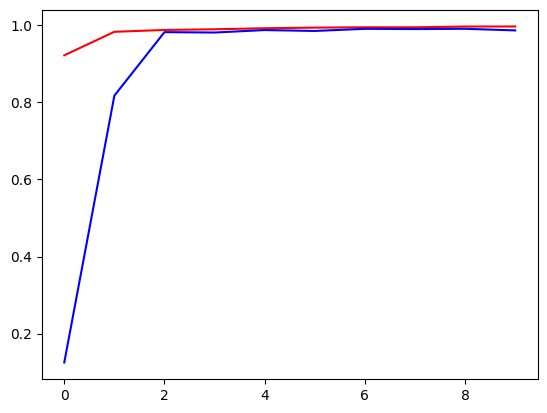

In [91]:
plt.plot(hist.history['accuracy'],color='red')
plt.plot(hist.history['val_accuracy'],color='blue')